In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from os.path import basename
sns.set(style="whitegrid")
current_palette = sns.color_palette()
sns.palplot(current_palette)

%matplotlib inline

In [15]:
nnAudio_result = sorted(glob.glob('./result_clean/nnAudio*'), reverse=True)
trainable_result = sorted(glob.glob('./result_clean/trainable*'), reverse=True)
librosa_result = sorted(glob.glob('./result_clean/librosa*'), reverse=True)

In [16]:
def plot_results(filename, ax, color=0, line='-'):
    with open(filename, 'rb') as f:
        result = pickle.load(f)   
        
    accum_time = []
    start = result['loading_time']

    accum_time.append(start)
    for idx,i in enumerate(result['time_histroy']):
        accum_time.append(accum_time[-1]+i)
        
    ax.plot(accum_time, line, color=current_palette[color], linewidth=3)
    if 'STFT' in basename(filename):
        ax.set_title(f'STFT: n_fft={basename(filename)[-4:]}, hop=512', size=18)
    elif 'Mel' in basename(filename):
        ax.set_title(f'Mel: n_fft=4096, n_mels={basename(filename)[-3:]}', size=18)
    elif 'CQT' in basename(filename):
        ax.set_title(f'CQT: bins_per_octave={12*int(basename(filename)[-1])}, bins={88*int(basename(filename)[-1])}', size=18)
    else:
        ax.set_title('N.A.', size=18)

    ax.set_ylabel('Time (seconds)', size=14)
    ax.set_xlabel('Epoch', size=14)
    ax.tick_params(labelsize=12)        
        
    return ax
    

def plot_dash_results(filename, ax):
    with open(filename, 'rb') as f:
        result = pickle.load(f)   
        
    accum_time = []
    start = result['loading_time'] + result['processing_time']
    
    accum_time.append(start)
    for idx,i in enumerate(result['time_histroy']):
        accum_time.append(accum_time[-1]+i)
        
    ax.plot(accum_time, '--',color=current_palette[0], linewidth=3)

    
    
    return ax

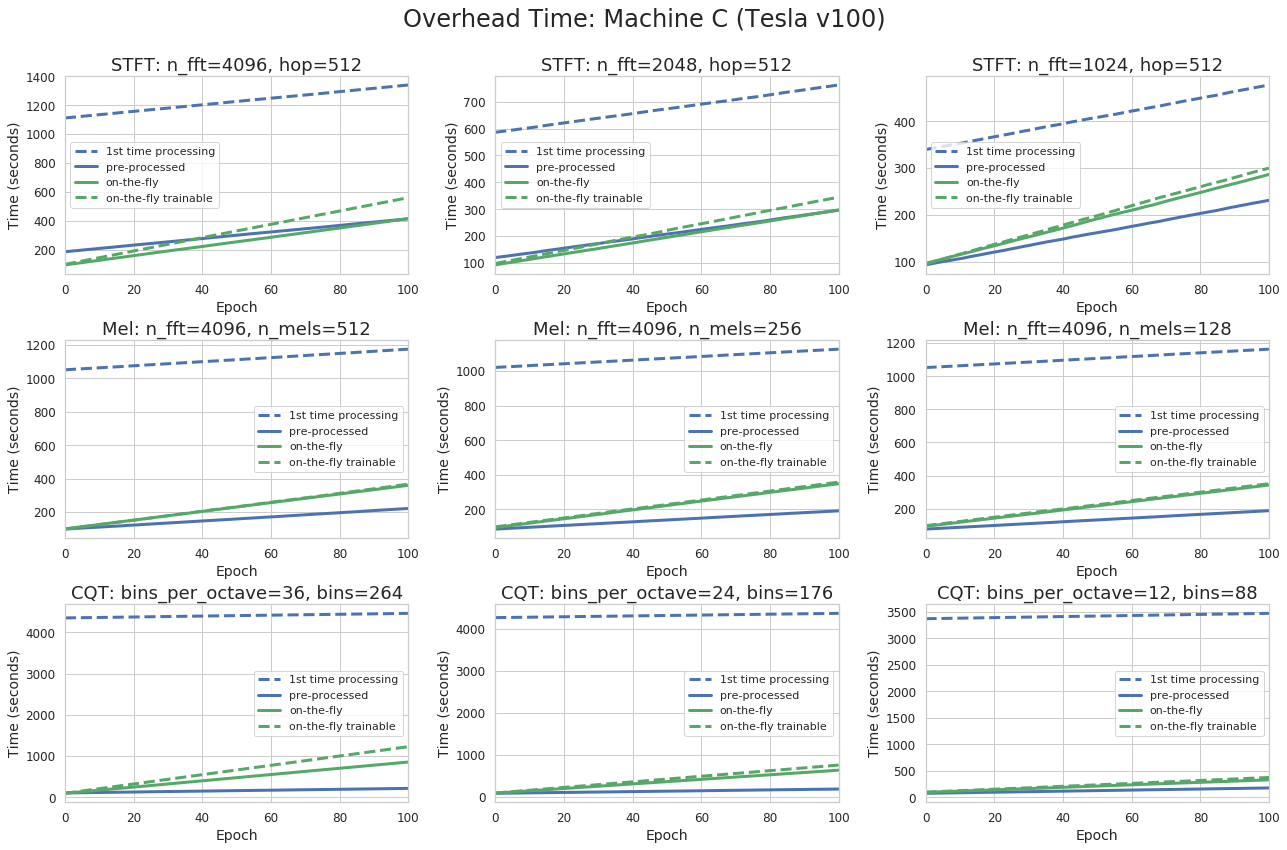

In [17]:
fig = plt.figure(figsize=(18,12))
ax = fig.subplots(3,3)

for ax_i, result_i in zip(ax.flatten(), librosa_result):
    plot_dash_results(result_i, ax_i)
    plot_results(result_i, ax_i, 0)
       

for ax_i, result_i in zip(ax.flatten(), nnAudio_result):
    plot_results(result_i, ax_i, 2)
    
for ax_i, result_i in zip(ax.flatten(), trainable_result):
    plot_results(result_i, ax_i, 2, '--')    
    ax_i.legend(['1st time processing','pre-processed', 'on-the-fly', 'on-the-fly trainable'])
#     ax_i.set_ylim(0,1500)
    ax_i.set_xlim(0,100)
fig.suptitle('Overhead Time: Machine C (Tesla v100)', size=24) # or plt.suptitle('Main title')
fig.tight_layout()  
fig.subplots_adjust(top=0.9)

In [18]:
def plot_loss(filename, ax, color=0, line='-'):
    with open(filename, 'rb') as f:
        result = pickle.load(f)   
        
    accum_time = []
    loss = result['loss_histroy']
        
    ax.plot(loss, line, color=current_palette[color], linewidth=3)
    ax.set_ylabel('Loss', size=14)
    ax.set_xlabel('Epoch', size=14)
    ax.tick_params(labelsize=12)
    if 'STFT' in basename(filename):
        ax.set_title(f'STFT: n_fft={basename(filename)[-4:]}, hop=512', size=18)
    elif 'Mel' in basename(filename):
        ax.set_title(f'Mel: n_fft=4096, n_mels={basename(filename)[-3:]}', size=18)
    elif 'CQT' in basename(filename):
        ax.set_title(f'CQT: bins_per_octave={12*int(basename(filename)[-1])}, bins={88*int(basename(filename)[-1])}', size=18)
    else:
        ax.set_title('N.A.', size=18)
    
    return ax

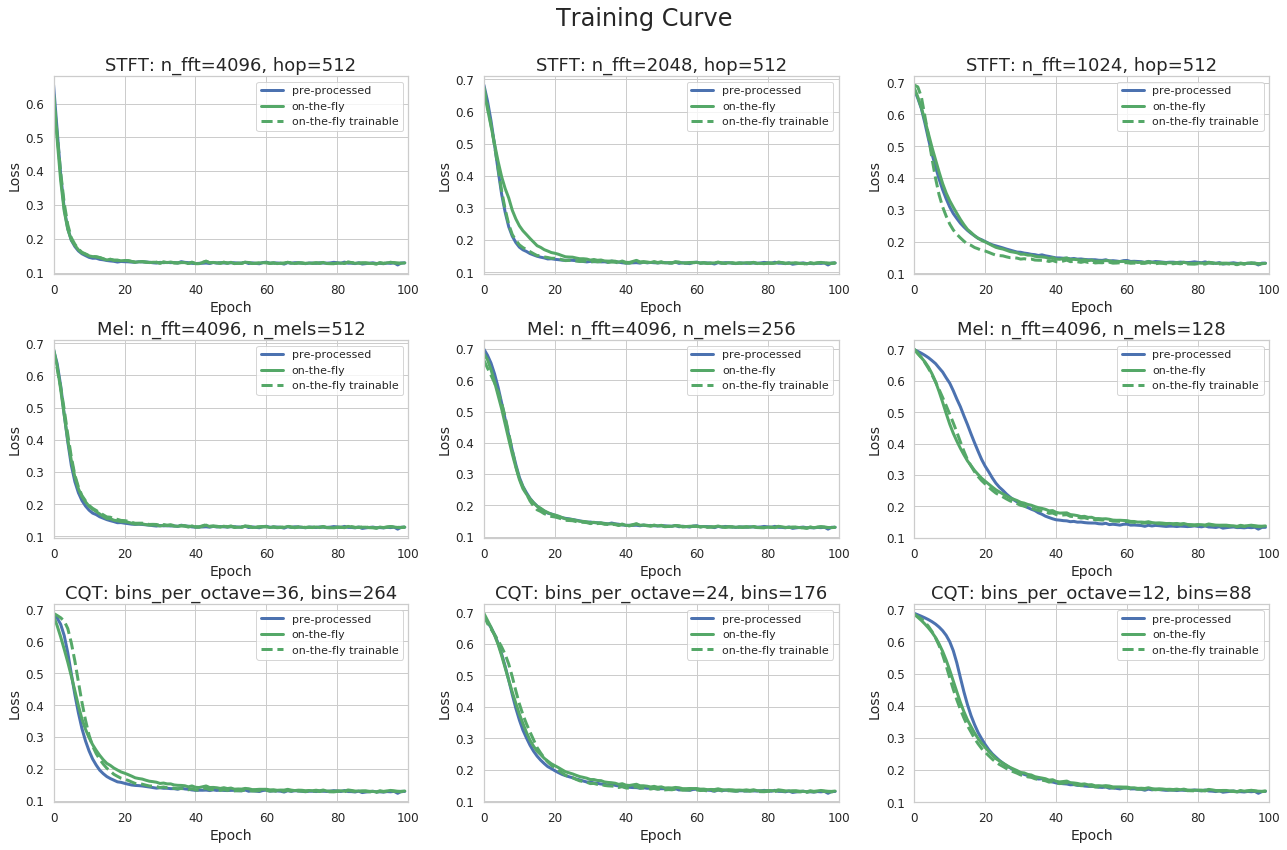

In [19]:
fig = plt.figure(figsize=(18,12))
ax = fig.subplots(3,3)

for ax_i, result_i in zip(ax.flatten(), librosa_result):
    plot_loss(result_i, ax_i, 0)
    
for ax_i, result_i in zip(ax.flatten(), nnAudio_result):
    plot_loss(result_i, ax_i, 2)
    
for ax_i, result_i in zip(ax.flatten(), trainable_result):
    plot_loss(result_i, ax_i, 2, '--')
    
    ax_i.set_xlim(0,100)
    ax_i.legend(['pre-processed', 'on-the-fly', 'on-the-fly trainable'])
    
fig.suptitle('Training Curve', size=24) # or plt.suptitle('Main title')
fig.tight_layout()  
fig.subplots_adjust(top=0.9)

# GTX result

In [7]:
nnAudio_result = sorted(glob.glob('./GTX_result/nnAudio*'), reverse=True)
trainable_result = sorted(glob.glob('./GTX_result/trainable*'), reverse=True)
librosa_result = sorted(glob.glob('./GTX_result/librosa*'), reverse=True)

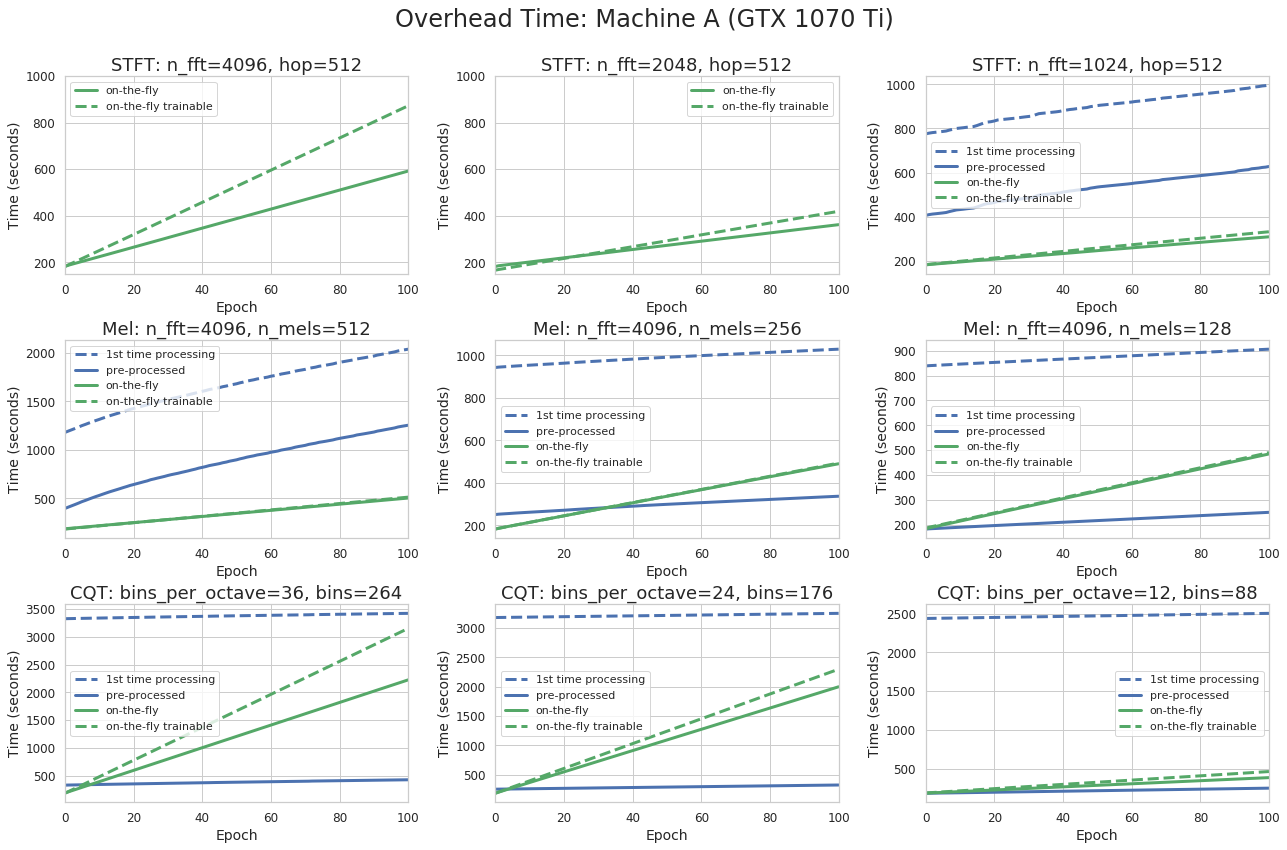

In [8]:
fig = plt.figure(figsize=(18,12))
ax = fig.subplots(3,3)

for idx, (ax_i, result_i) in enumerate(zip(ax.flatten(), librosa_result)):
    if idx < 2:
        ax_i.set_ylim(150,1000)
        pass
    else:
        plot_dash_results(result_i, ax_i)
        plot_results(result_i, ax_i, 0)
    

for idx, (ax_i, result_i) in enumerate(zip(ax.flatten(), nnAudio_result)):
    plot_results(result_i, ax_i, 2)
    
    
for idx, (ax_i, result_i) in enumerate(zip(ax.flatten(), trainable_result)):
    plot_results(result_i, ax_i, 2, '--')    
    if idx < 2:
        ax_i.legend(['on-the-fly', 'on-the-fly trainable'])
    else:
        ax_i.legend(['1st time processing','pre-processed', 'on-the-fly','on-the-fly trainable'])
    
#     ax_i.set_ylim(0,1500)
    ax_i.set_xlim(0,100)

fig.suptitle('Overhead Time: Machine A (GTX 1070 Ti)', size=24) # or plt.suptitle('Main title')
fig.tight_layout()  
fig.subplots_adjust(top=0.9)   

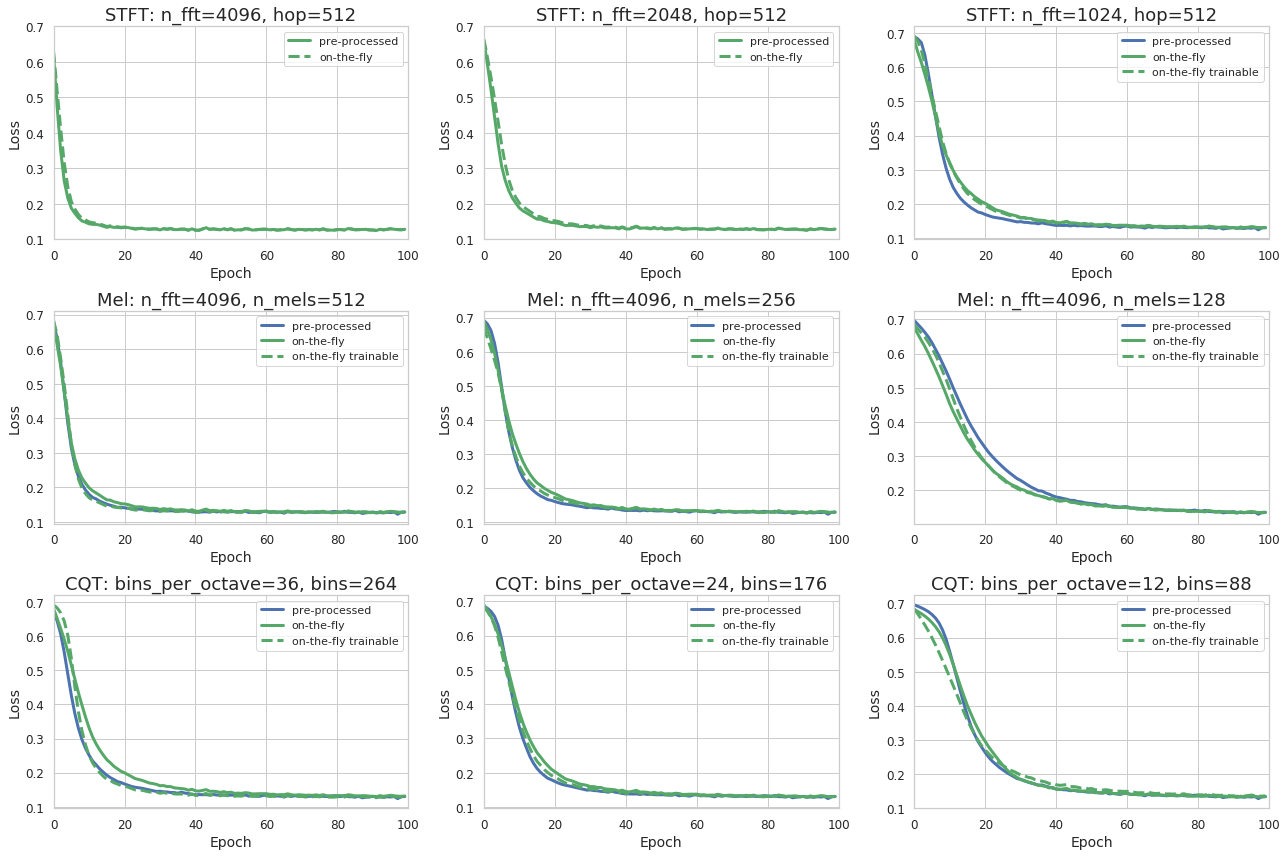

In [9]:
fig = plt.figure(figsize=(18,12))
ax = fig.subplots(3,3)

for idx, (ax_i, result_i) in enumerate(zip(ax.flatten(), librosa_result)):
    if idx < 2:
        ax_i.set_ylim(0.1,0.7)
        pass
    else:
        plot_loss(result_i, ax_i, 0)    
    
for ax_i, result_i in zip(ax.flatten(), nnAudio_result):
    plot_loss(result_i, ax_i, 2)
    
for ax_i, result_i in zip(ax.flatten(), trainable_result):

    plot_loss(result_i, ax_i, 2, '--')
    
    ax_i.set_xlim(0,100)
    if idx < 2:
        ax_i.legend(['on-the-fly', 'on-the-fly trainable'])
    else:
        ax_i.legend(['pre-processed', 'on-the-fly', 'on-the-fly trainable'])
fig.tight_layout()    

# RTX

In [22]:
nnAudio_result = sorted(glob.glob('./RTX_result/nnAudio*'), reverse=True)
trainable_result = sorted(glob.glob('./RTX_result/trainable*'), reverse=True)
librosa_result = sorted(glob.glob('./RTX_result/librosa*'), reverse=True)

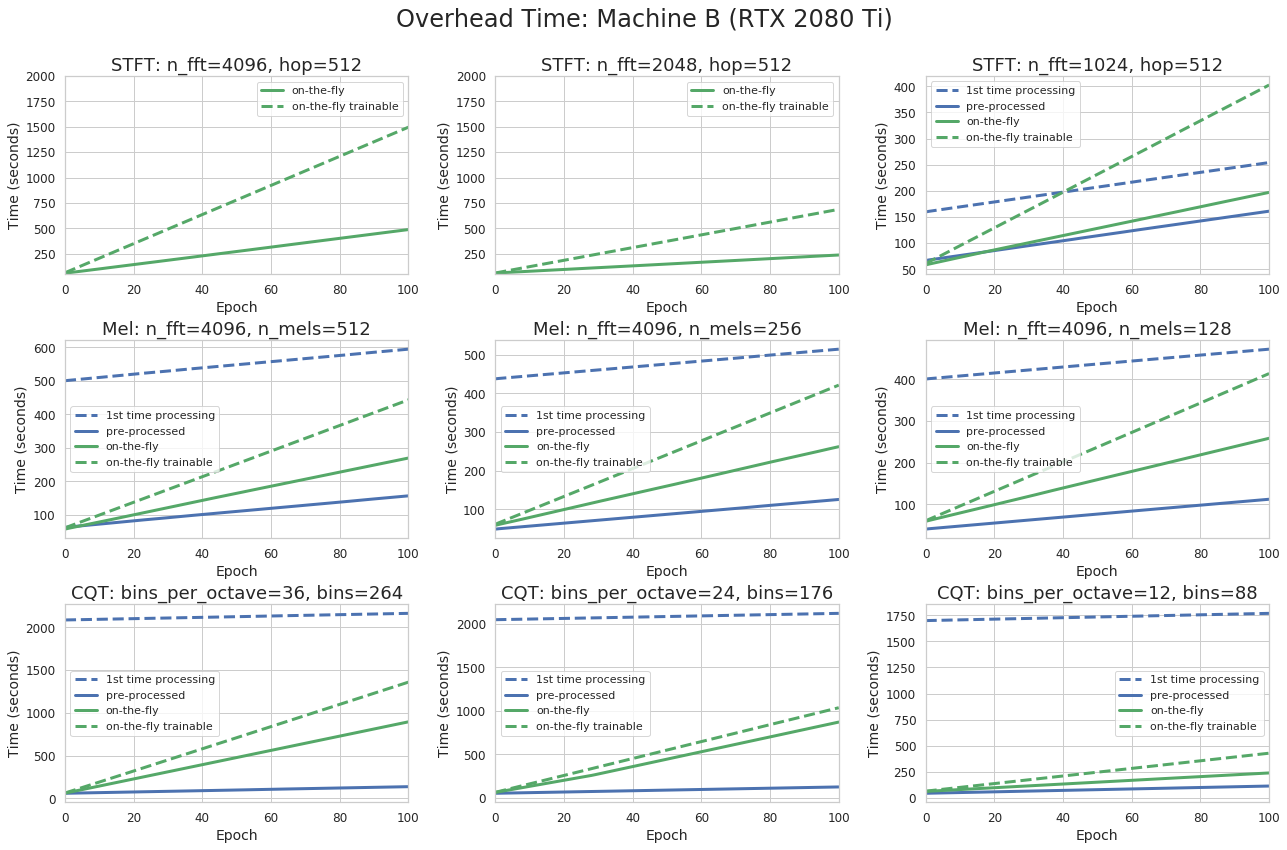

In [23]:
fig = plt.figure(figsize=(18,12))
ax = fig.subplots(3,3)

for idx, (ax_i, result_i) in enumerate(zip(ax.flatten(), librosa_result)):
    if idx < 2:
        ax_i.set_ylim(50,2000)
        pass
    else:
        plot_dash_results(result_i, ax_i)
        plot_results(result_i, ax_i, 0)
    

for idx, (ax_i, result_i) in enumerate(zip(ax.flatten(), nnAudio_result)):
    plot_results(result_i, ax_i, 2)
    
    
for idx, (ax_i, result_i) in enumerate(zip(ax.flatten(), trainable_result)):
    plot_results(result_i, ax_i, 2, '--')    
    if idx < 2:
        ax_i.legend(['on-the-fly', 'on-the-fly trainable'])
    else:
        ax_i.legend(['1st time processing','pre-processed', 'on-the-fly','on-the-fly trainable'])
    
#     ax_i.set_ylim(0,1500)
    ax_i.set_xlim(0,100)

fig.suptitle('Overhead Time: Machine B (RTX 2080 Ti)', size=24) # or plt.suptitle('Main title')
fig.tight_layout()  
fig.subplots_adjust(top=0.9)     

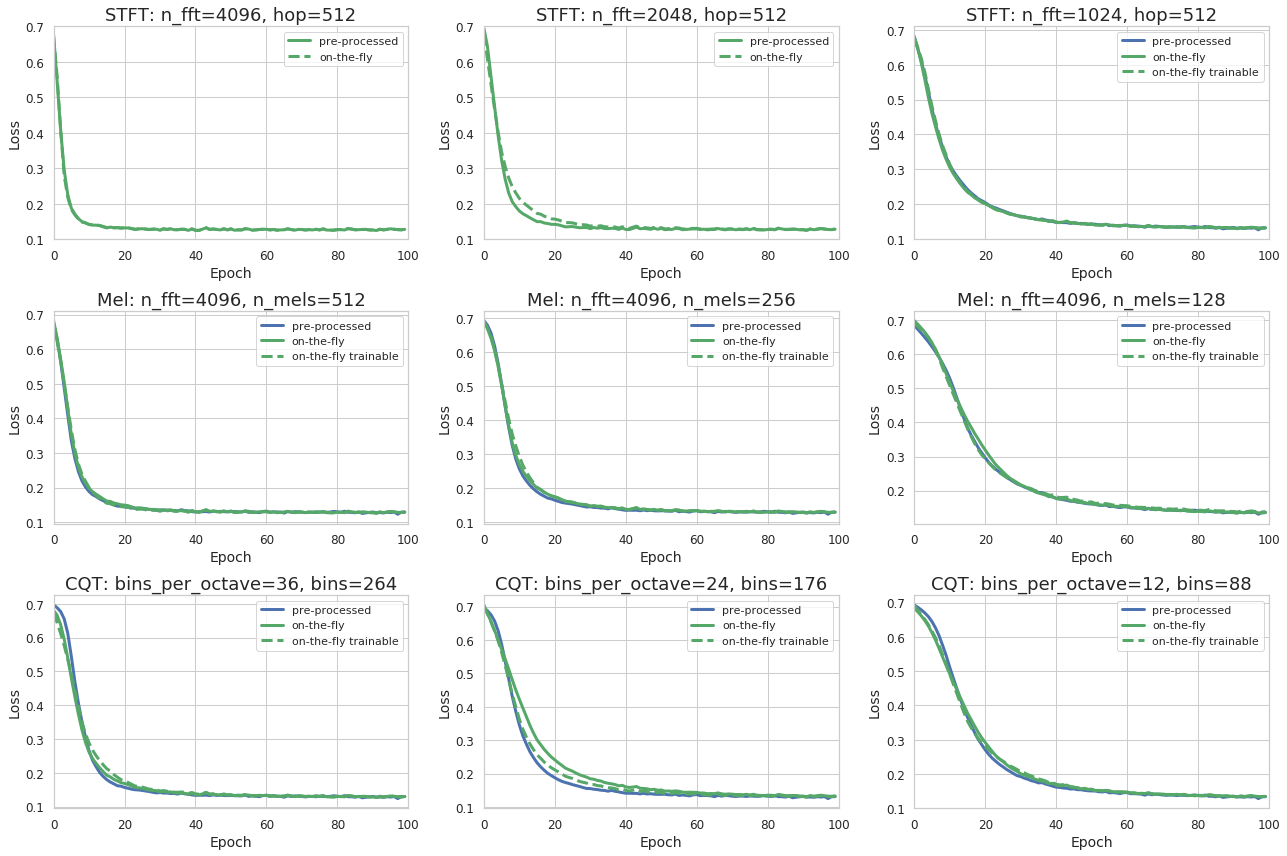

In [58]:
fig = plt.figure(figsize=(18,12))
ax = fig.subplots(3,3)

for idx, (ax_i, result_i) in enumerate(zip(ax.flatten(), librosa_result)):
    if idx < 2:
        ax_i.set_ylim(0.1,0.7)
        pass
    else:
        plot_loss(result_i, ax_i, 0)    
    
for ax_i, result_i in zip(ax.flatten(), nnAudio_result):
    plot_loss(result_i, ax_i, 2)
    
for ax_i, result_i in zip(ax.flatten(), trainable_result):
    plot_loss(result_i, ax_i, 2, '--')
    
    ax_i.set_xlim(0,100)
    ax_i.legend(['pre-processed', 'on-the-fly', 'on-the-fly trainable'])
fig.tight_layout()    